In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
#Check null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
#Check datatypes of every column
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
#Getting Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#Finding Average age
print(df['age'].mean())

19468.865814285713


In [7]:
#Remove id column
df=df.drop(columns=['id'])

In [8]:
#Generate Correlation Matrix
df.corr(numeric_only=True)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [9]:
#How many people drinking alcohol
print(df['alco'].value_counts())

alco
0    66236
1     3764
Name: count, dtype: int64


In [10]:
#How many people smoke
print(df['smoke'].value_counts())

smoke
0    63831
1     6169
Name: count, dtype: int64


In [11]:
#How many people are active
print(df['active'].value_counts())

active
1    56261
0    13739
Name: count, dtype: int64


In [12]:
#How many people have cardio disease
print(df['cardio'].value_counts())

cardio
0    35021
1    34979
Name: count, dtype: int64


In [13]:
#Normalise Age from days to years
df["age"] = (df["age"]/365).astype(int)
df["age"]

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [14]:
#Display shape
df.shape

(70000, 12)

In [15]:
#Remove invalid blood pressure values
df = df[(df['ap_hi'] >= df['ap_lo'])]
df = df[(df['ap_hi'] >= df['ap_lo']) & (df['ap_hi'] <= 250) & (df['ap_lo'] >= 40)]

In [16]:
#Remove invalid height and weight
df = df[(df['height'] > 50) & (df['height'] < 250)]
df = df[(df['weight'] > 20) & (df['weight'] < 300)]

In [17]:
#Adding BMI feature
df["BMI"] = df["weight"] / ( (df["height"]/100)**2 )

In [34]:
#Check duplicate records
df.duplicated().sum()

np.int64(0)

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

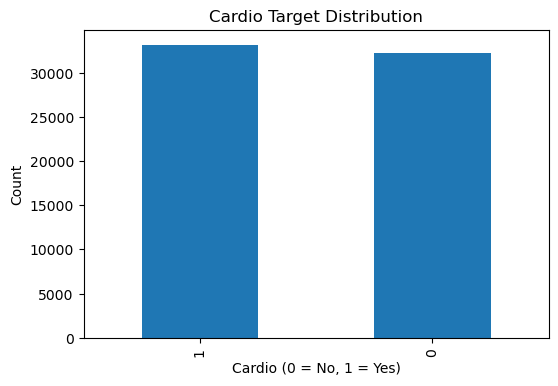

In [20]:
#Cardio Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['cardio'].value_counts().plot(kind='bar')
plt.title("Cardio Target Distribution")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

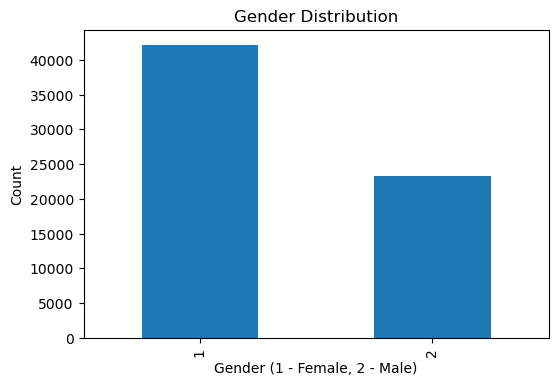

In [21]:
#Gender Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender (1 - Female, 2 - Male)")
plt.ylabel("Count")
plt.show()

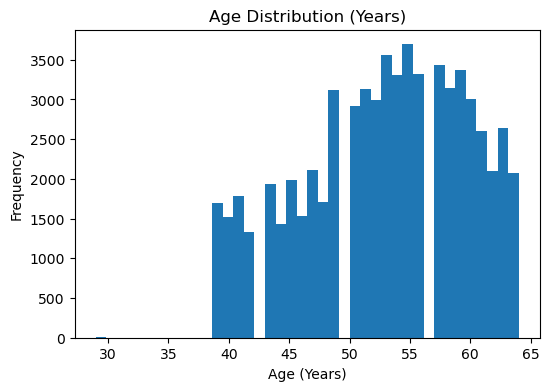

In [22]:
#Age Distribution
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=40)
plt.title("Age Distribution (Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()

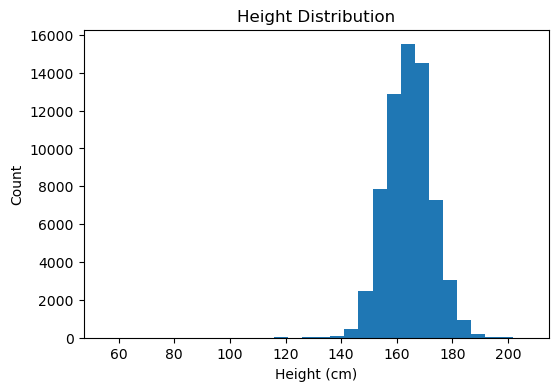

In [23]:
#Height Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['height'], bins=30)
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

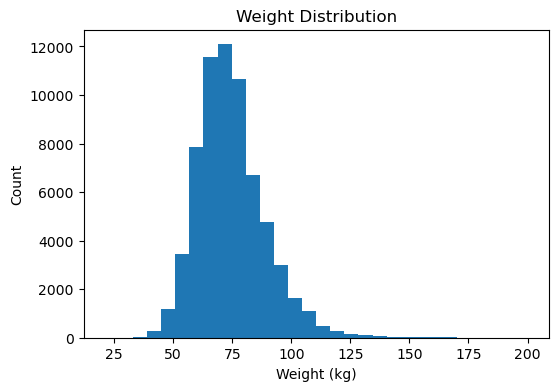

In [24]:
#Weight Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['weight'], bins=30)
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

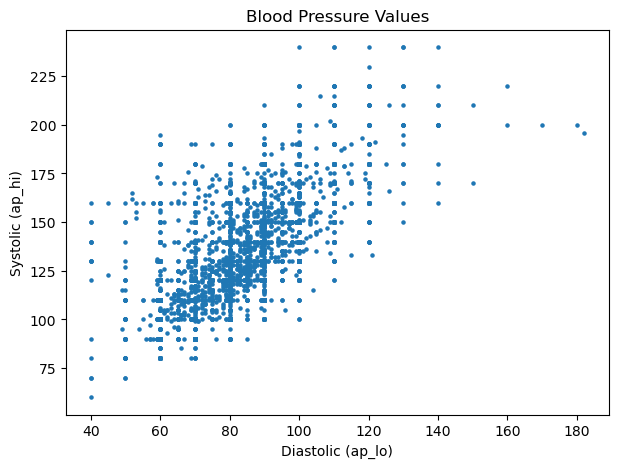

In [25]:
#Blood Pressure Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(df['ap_lo'], df['ap_hi'], s=5)
plt.title("Blood Pressure Values")
plt.xlabel("Diastolic (ap_lo)")
plt.ylabel("Systolic (ap_hi)")
plt.show()

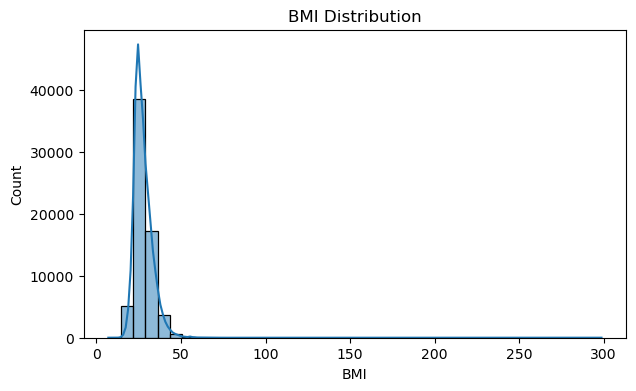

In [26]:
#BMI Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.histplot(df['BMI'], bins=40, kde=True)
plt.title("BMI Distribution")
plt.show()

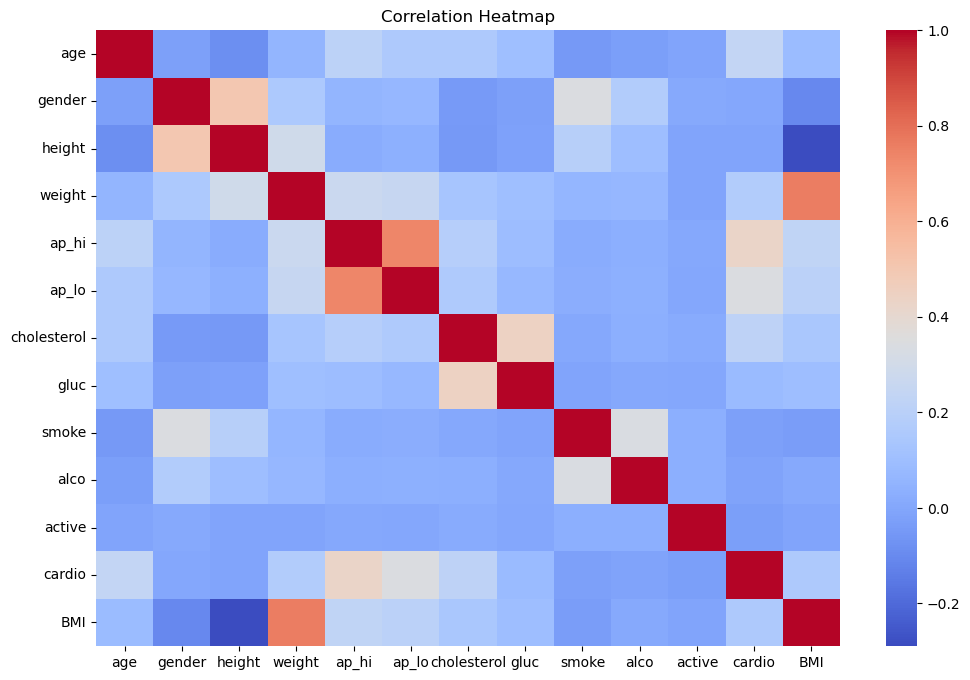

In [27]:
#Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

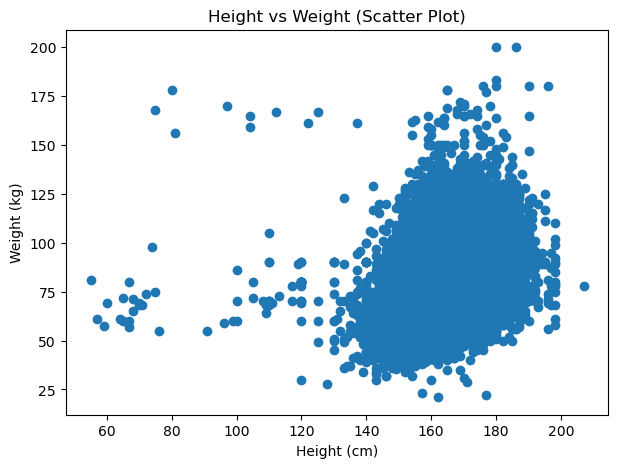

In [28]:
#Height vs Weight Distribution
plt.figure(figsize=(7,5))
plt.scatter(df['height'], df['weight'])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight (Scatter Plot)")
plt.show()

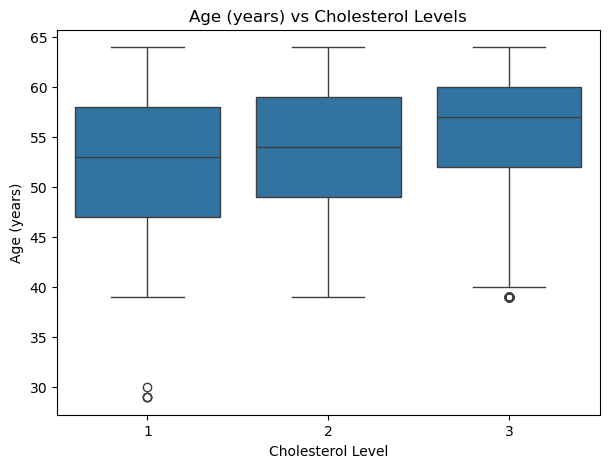

In [29]:
#Age vs Cholestrol
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='cholesterol', y='age', data=df)
plt.title("Age (years) vs Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Age (years)")
plt.show()

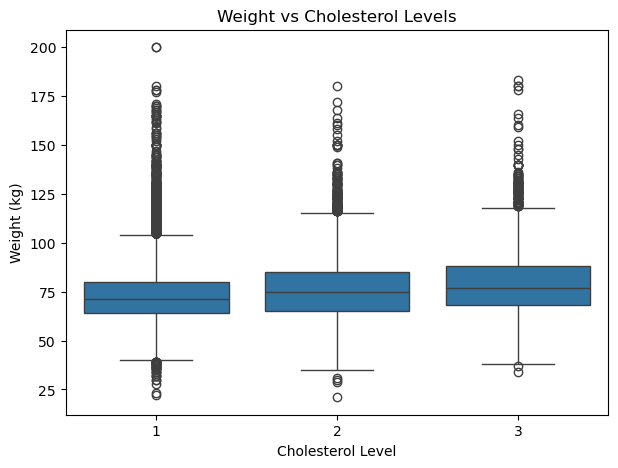

In [30]:
#Weight vs Cholestrol
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='cholesterol', y='weight', data=df)
plt.title("Weight vs Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Weight (kg)")
plt.show()

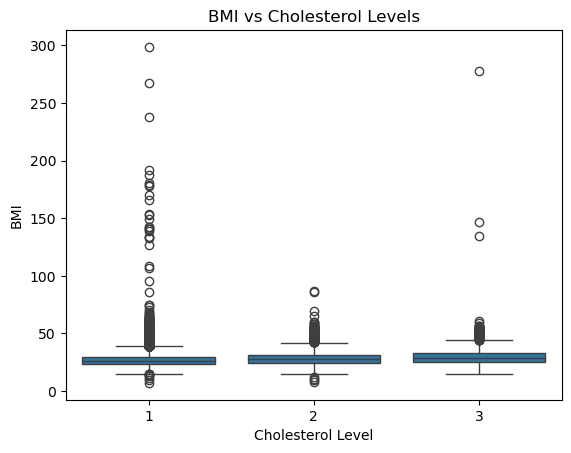

In [31]:
#BMI vs Cholestrol
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df["cholesterol"], y=df["BMI"])
plt.xlabel("Cholesterol Level")
plt.ylabel("BMI")
plt.title("BMI vs Cholesterol Levels")
plt.show()

In [32]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [33]:
df.to_csv("cardio_train_clean.csv",index=False)